
# Project : Investigate a Dataset : TMDb movie data 

#### Welcome to my project about TMDb movie data! 
#### There are two questions for analysis
     1. What is top 10 production companies in term of average popularity?
     2. Genre proportion of all movies!

## Step1 : Import necessary library

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Step2 :Data Wrangling

   ### Load Data

In [58]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Check Missing Data and Data Type Correction

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Data Wrangling Summary
1. Csv file is already loaded as 'df' DataFrame.
2. There are 10866 rows and 20 columns.
3. Data type are all corrected.
4. Columns that contain missing value are all objects. Hence missing data are not need to be filled.

### Data Cleaning 

#### If there are any duplicated row, it will be dropped.

In [60]:
#Check and drop duplicated row
df.duplicated().sum()

1

There is a duplicated row.

In [61]:
#Drop duplicated row
df.drop_duplicates(inplace = True)
#Check duplicated row again, result should be 0.
df.duplicated().sum()

0

All duplicated row was already dropped.

#### Drop Extraneous Column

Result from df.info() and df.head() shows that some columns are not necessary for our two questions.
- 'id','imdb_id' both are just number that specified each movie. These number cannot be summarize statistically.
- 'homepage','tagline','keywords','overview' are just strings describing each movies.
- 'cast','director' are informative but not necessary for questions
Hence we drop these columns

In [62]:
#Drop Extraneous Columns
df.drop(['id','imdb_id','homepage','tagline','keywords','overview','cast','director'],axis = 1, inplace = True)
df.head()

,popularity,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Check Dataframe information after drop extraneous columns

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   runtime               10865 non-null  int64  
 5   genres                10842 non-null  object 
 6   production_companies  9835 non-null   object 
 7   release_date          10865 non-null  object 
 8   vote_count            10865 non-null  int64  
 9   vote_average          10865 non-null  float64
 10  release_year          10865 non-null  int64  
 11  budget_adj            10865 non-null  float64
 12  revenue_adj           10865 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.2+ MB


There are null value for columns **genres and production_companies**

Our questions need data from **genres and production_companies**, so we decide to drop all rows that contain null value

In [64]:
#drop all null value rows
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9826 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9826 non-null   float64
 1   budget                9826 non-null   int64  
 2   revenue               9826 non-null   int64  
 3   original_title        9826 non-null   object 
 4   runtime               9826 non-null   int64  
 5   genres                9826 non-null   object 
 6   production_companies  9826 non-null   object 
 7   release_date          9826 non-null   object 
 8   vote_count            9826 non-null   int64  
 9   vote_average          9826 non-null   float64
 10  release_year          9826 non-null   int64  
 11  budget_adj            9826 non-null   float64
 12  revenue_adj           9826 non-null   float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.0+ MB


In [65]:
#See sample of cleaned dataframe
df.head()

,popularity,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Data cleaning summary
1. There is a duplicated row, hence it was already dropped.
2. There are few columns which are not important for analysis, so it was dropped.
3. Drop all row that contain null values, 9826 rows ready for analysis


## Exploratory Data Analysis

### Research Question 1: What is top 10 production companies in term of average popularity?

In [66]:
#select only columns used for this question
df1 = df[['original_title','popularity','production_companies']]
df1

,original_title,popularity,production_companies
0,Jurassic World,32.985763,Universal Studios|Amblin Entertainment|Legenda...
1,Mad Max: Fury Road,28.419936,Village Roadshow Pictures|Kennedy Miller Produ...
2,Insurgent,13.112507,Summit Entertainment|Mandeville Films|Red Wago...
3,Star Wars: The Force Awakens,11.173104,Lucasfilm|Truenorth Productions|Bad Robot
4,Furious 7,9.335014,Universal Pictures|Original Film|Media Rights ...
...,...,...,...
10861,The Endless Summer,0.080598,Bruce Brown Films
10862,Grand Prix,0.065543,Cherokee Productions|Joel Productions|Douglas ...
10863,Beregis Avtomobilya,0.065141,Mosfilm
10864,"What's Up, Tiger Lily?",0.064317,Benedict Pictures Corp.


In [67]:
#split columns 'production_companies' by seperator '|' into lists
df1['production_companies']=df1.production_companies.str.split('|')
df1

C:\Users\User\AppData\Local\Temp/ipykernel_11276/2680164141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['production_companies']=df1.production_companies.str.split('|')


,original_title,popularity,production_companies
0,Jurassic World,32.985763,"[Universal Studios, Amblin Entertainment, Lege..."
1,Mad Max: Fury Road,28.419936,"[Village Roadshow Pictures, Kennedy Miller Pro..."
2,Insurgent,13.112507,"[Summit Entertainment, Mandeville Films, Red W..."
3,Star Wars: The Force Awakens,11.173104,"[Lucasfilm, Truenorth Productions, Bad Robot]"
4,Furious 7,9.335014,"[Universal Pictures, Original Film, Media Righ..."
...,...,...,...
10861,The Endless Summer,0.080598,[Bruce Brown Films]
10862,Grand Prix,0.065543,"[Cherokee Productions, Joel Productions, Dougl..."
10863,Beregis Avtomobilya,0.065141,[Mosfilm]
10864,"What's Up, Tiger Lily?",0.064317,[Benedict Pictures Corp.]


In [68]:
#duplicate rows for each production company
df1=df1.explode('production_companies')
df1

,original_title,popularity,production_companies
0,Jurassic World,32.985763,Universal Studios
0,Jurassic World,32.985763,Amblin Entertainment
0,Jurassic World,32.985763,Legendary Pictures
0,Jurassic World,32.985763,Fuji Television Network
0,Jurassic World,32.985763,Dentsu
...,...,...,...
10862,Grand Prix,0.065543,Joel Productions
10862,Grand Prix,0.065543,Douglas & Lewis Productions
10863,Beregis Avtomobilya,0.065141,Mosfilm
10864,"What's Up, Tiger Lily?",0.064317,Benedict Pictures Corp.


In [69]:
#group average popularity by each production_companies, convert resuult from groupby function to dataframe
avg_pop_df= df1.groupby('production_companies')['popularity'].mean().to_frame(name = 'average_popularity').reset_index()
#Select only top 10 results
avg_pop_df = avg_pop_df.sort_values(by= "average_popularity",ascending=False)[0:10]
avg_pop_df

,production_companies,average_popularity
1124,Bulletproof Cupid,14.311205
2787,Fuji Television Network,12.777401
1904,DefyNite Films,11.422751
7237,Truenorth Productions,11.173104
62,3Foot7,10.174599
4086,Linson Films,8.947905
588,Atman Entertainment,8.947905
1065,Bristol Automotive,8.110711
1865,Dayday Films,7.137273
6747,Syncopy,7.050715


In [70]:
#Ascending sort popularity score

avg_pop_df=avg_pop_df.sort_values(by= "average_popularity",ascending=True)
avg_pop_df

,production_companies,average_popularity
6747,Syncopy,7.050715
1865,Dayday Films,7.137273
1065,Bristol Automotive,8.110711
4086,Linson Films,8.947905
588,Atman Entertainment,8.947905
62,3Foot7,10.174599
7237,Truenorth Productions,11.173104
1904,DefyNite Films,11.422751
2787,Fuji Television Network,12.777401
1124,Bulletproof Cupid,14.311205


Text(0.5, 1.0, 'Top 10 Popular Movie Maker')

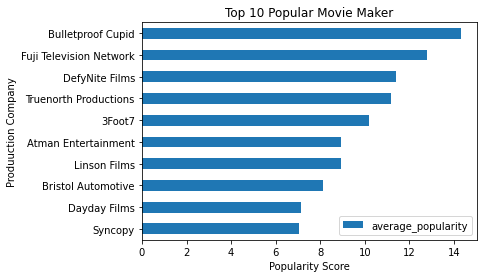

In [71]:
#scatter plot between budget and popularity
avg_pop_df.plot.barh(x='production_companies')
plt.xlabel('Popularity Score')
plt.ylabel('Produuction Company')
plt.title('Top 10 Popular Movie Maker')


#### Question 1 Summary
The best production company that make movie with highest popularity score is Bulletproof Cupid (score=14.3). Nine other top movie maker are shown as barh plot as above. 

### Research Question 2  :  Genre proportion of all movies!

In [72]:
#select only columns used for this question
df3 = df[['original_title','genres']]
df3

,original_title,genres
0,Jurassic World,Action|Adventure|Science Fiction|Thriller
1,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller
2,Insurgent,Adventure|Science Fiction|Thriller
3,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy
4,Furious 7,Action|Crime|Thriller
...,...,...
10861,The Endless Summer,Documentary
10862,Grand Prix,Action|Adventure|Drama
10863,Beregis Avtomobilya,Mystery|Comedy
10864,"What's Up, Tiger Lily?",Action|Comedy


In [73]:
#split columns 'genres' by seperator '|' into lists
df3['genres']=df3.genres.str.split('|')
df3

C:\Users\User\AppData\Local\Temp/ipykernel_11276/1385481877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['genres']=df3.genres.str.split('|')


,original_title,genres
0,Jurassic World,"[Action, Adventure, Science Fiction, Thriller]"
1,Mad Max: Fury Road,"[Action, Adventure, Science Fiction, Thriller]"
2,Insurgent,"[Adventure, Science Fiction, Thriller]"
3,Star Wars: The Force Awakens,"[Action, Adventure, Science Fiction, Fantasy]"
4,Furious 7,"[Action, Crime, Thriller]"
...,...,...
10861,The Endless Summer,[Documentary]
10862,Grand Prix,"[Action, Adventure, Drama]"
10863,Beregis Avtomobilya,"[Mystery, Comedy]"
10864,"What's Up, Tiger Lily?","[Action, Comedy]"


In [74]:
#duplicate rows for each production company
df3=df3.explode('genres')
df3

,original_title,genres
0,Jurassic World,Action
0,Jurassic World,Adventure
0,Jurassic World,Science Fiction
0,Jurassic World,Thriller
1,Mad Max: Fury Road,Action
...,...,...
10863,Beregis Avtomobilya,Mystery
10863,Beregis Avtomobilya,Comedy
10864,"What's Up, Tiger Lily?",Action
10864,"What's Up, Tiger Lily?",Comedy


In [75]:
#Count total amount of each unique genre
df3['genres'].value_counts()

Drama              4372
Comedy             3442
Thriller           2748
Action             2239
Romance            1572
Horror             1526
Adventure          1390
Crime              1299
Science Fiction    1141
Family             1107
Fantasy             843
Mystery             773
Animation           641
Music               342
Documentary         338
History             308
War                 259
Western             160
TV Movie            135
Foreign             122
Name: genres, dtype: int64

In [76]:
#Find total count
total = df3['genres'].value_counts().sum()
total

24757

In [77]:
#Calculate percentage for each genre
genre_portion = (df3['genres'].value_counts() / df3['genres'].value_counts().sum())*100
genre_portion_df = pd.DataFrame(genre_portion)
genre_portion_df=genre_portion_df.reset_index()
genre_portion_df.columns = ['genre','proportion']
genre_portion_df

,genre,proportion
0,Drama,17.659652
1,Comedy,13.903139
2,Thriller,11.099891
3,Action,9.043907
4,Romance,6.349719
5,Horror,6.163913
6,Adventure,5.614574
7,Crime,5.247001
8,Science Fiction,4.608798
9,Family,4.471463


#### There are too much genre in a pie chart that make pie chart hard to read
#### Hence all genre below 5.3 %('Crime') will be shown as 'Other' genre

In [78]:
#Slice 'genre_portion_df' from Drama to Crime
genre_portion_df = genre_portion_df[0:8]
genre_portion_df

,genre,proportion
0,Drama,17.659652
1,Comedy,13.903139
2,Thriller,11.099891
3,Action,9.043907
4,Romance,6.349719
5,Horror,6.163913
6,Adventure,5.614574
7,Crime,5.247001


In [79]:
#Append 'Other' row that shows the rest percentage
#First find percentage of other genre
other= 100 - genre_portion_df['proportion'].sum()
#Add other genre using loc
genre_portion_df.loc[8]=['Other',other]
#Set 'genre' column as index
genre_portion_df = genre_portion_df.set_index('genre')
genre_portion_df

J:\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,proportion
genre,
Drama,17.659652
Comedy,13.903139
Thriller,11.099891
Action,9.043907
Romance,6.349719
Horror,6.163913
Adventure,5.614574
Crime,5.247001
Other,24.918205


<AxesSubplot:title={'center':'Genre proportion of all movies'}>

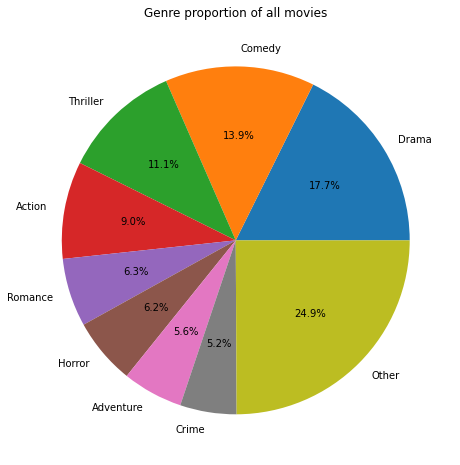

In [80]:
#Pie Plot
genre_portion_df.plot.pie(y='proportion',autopct='%0.1f%%',title= "Genre proportion of all movies", label="", legend= False, figsize=(8,8))

#### Summary question 2 : Genre proportion of all movies
The highest movie genre that was produced is Drama(17.7%). The lowest genre is Foreign(0.5%). (not shown in this pie chart)
Other genre proportion are shown as pie chart above.

## Conclusions

- Here are list of top 10 production company that make movie with  highest popularity score

     1. Bulletproof Cupid	(score=14.3)
     2. Fuji Television Network	(score=12.7)
     3. DefyNite Films	(score=11.4)
     4. Truenorth Productions	(score=11.1)
     5. 3Foot7	(score=10.1)
     6. Atman Entertainment	(score=8.9)
     7. Linson Films	(score=8.9)
     8. Bristol Automotive	(score=8.1)
     9. Dayday Films	(score=7.1)
     10.Syncopy	(score=7.0) 
   



- From all movies in dataset, genre proportion ranking are as below
    1. Drama       (17.7%)
    2. Comedy	   (13.9%)
    3. Thriller	   (11.1%)
    4. Action	   (9.0%)
    5. Romance	   (6.3%)
    6. Horror	   (6.2%)
    7. Adventure   (5.6%)
    8. Crime	   (5.21%)
    9. Other	   (24.9%)

- **Limitation**

    The limitation of this analysis is about cleaned data. We drop all null value for both columns (genre and production_company)
    
    Number of entries are decreased after cleaning
    - (-9) for production_company
    - (-1016) for genre
    
    For production_company, missing 9 entries from 9826 remaining might not significantly effect result.
    
    But for genre, missing 1016 entries from 9826 remaining (about 10%) might significantly effect result. **"Drama"** movies might not be made the most!
    
    
- **Improvment**

    I suggest to split dataframe for each question. Necessary columns should be specified before cleaning process (especially dropping null value)

In [2]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'investigate-a-dataset-template.ipynb'])

1